In [8]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
import scipy.stats as stats
from scipy.optimize import curve_fit

%matplotlib notebook


In [89]:
def rolldice(rolls):
    scores = []
    for i in range(rolls):
        scores.append(np.random.randint(1,7))
    
    return np.array(scores)

<IPython.core.display.Javascript object>


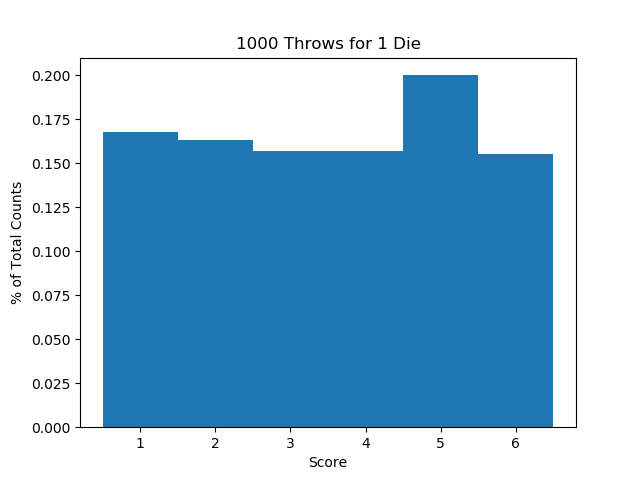

In [100]:
test = rolldice(1000)
bins = np.arange(1,8) - 0.5

plt.figure()
plt.title('1000 Throws for 1 Die')
plt.xlabel('Score')
plt.ylabel('% of Total Counts')
plt.hist(test, bins, density = True)
plt.show()

In [95]:
# 1000 throws of 1 die
mean = np.mean(test)
stdev = np.std(test)
print('Numerical Mean =', mean)
print('Numerical Standard deviation =', stdev)

# analytical mean
amean = (1 + 2 + 3 + 4 + 5 + 6)/6

# analytical stdev
total = 0
for i in range(1,7):
    sqdiff = (i - amean)**2
    total += sqdiff

astdev = np.sqrt(total/(6))
    
print('Analytical Mean = ', amean)
print('Analytical Standard deviation =', astdev)

Numerical Mean = 3.52
Numerical Standard deviation = 1.7232527382830414
Analytical Mean =  3.5
Analytical Standard deviation = 1.707825127659933


In [76]:
# multiple die per throw:
def multithrow(rolls, N = 1):
    scores = []
    #values = np.arange(1,7)
    
    for i in range(rolls):
        total = 0
        for j in range(N):
            total += np.random.randint(1,7)
        scores.append(total)
    
    bins = np.arange(N*1, (N*7)) - 0.5
    mean = np.mean(scores)
    stdev = np.std(scores)
    
    return scores, bins, mean, stdev

mean: 7.051
stdev: 2.419999793388421


<IPython.core.display.Javascript object>


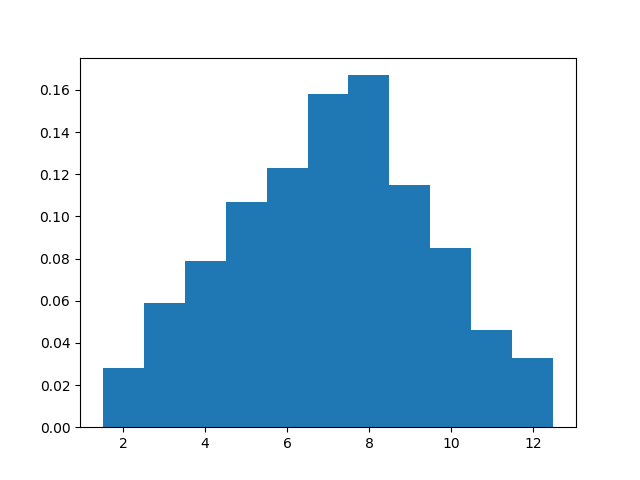

In [77]:
t2, bins2, mean2, stdev2 = multithrow(1000, 2)

print('mean:', mean2)
print('stdev:', stdev2)

plt.figure()
plt.hist(t2, bins2, density = True)
plt.show()



<IPython.core.display.Javascript object>


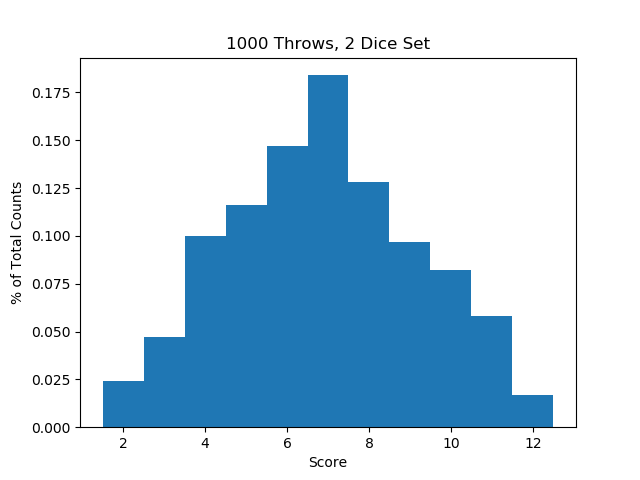

Mean for 2 Dice Set: 6.898
Standard Deviation for 2 Dice Set: 2.336577839490908


<IPython.core.display.Javascript object>


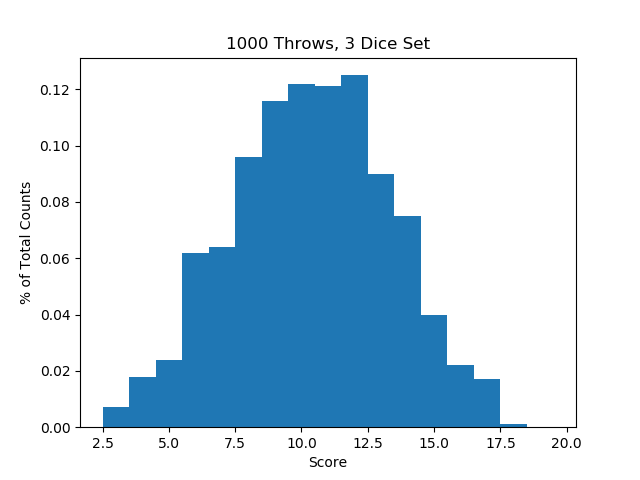

Mean for 3 Dice Set: 10.375
Standard Deviation for 3 Dice Set: 2.9729404635814687


<IPython.core.display.Javascript object>


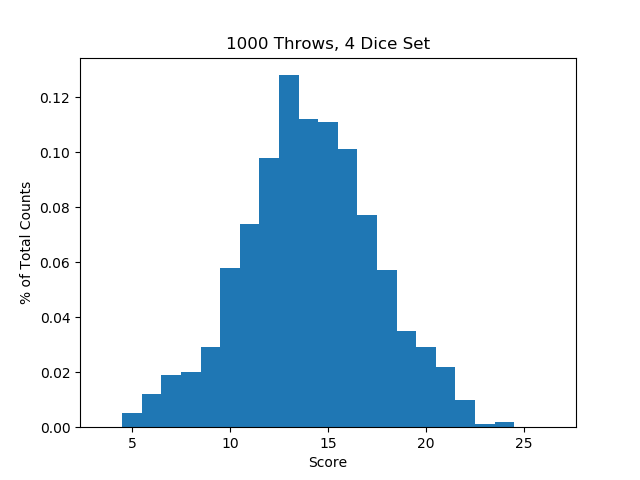

Mean for 4 Dice Set: 14.067
Standard Deviation for 4 Dice Set: 3.4200162280316744


<IPython.core.display.Javascript object>


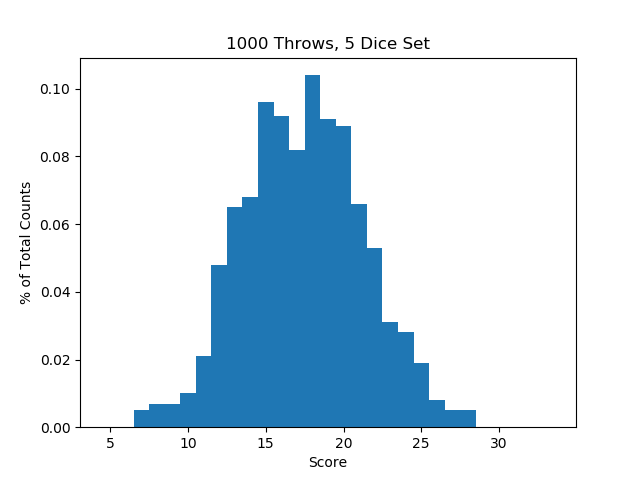

Mean for 5 Dice Set: 17.44
Standard Deviation for 5 Dice Set: 3.8732931724825583


<IPython.core.display.Javascript object>


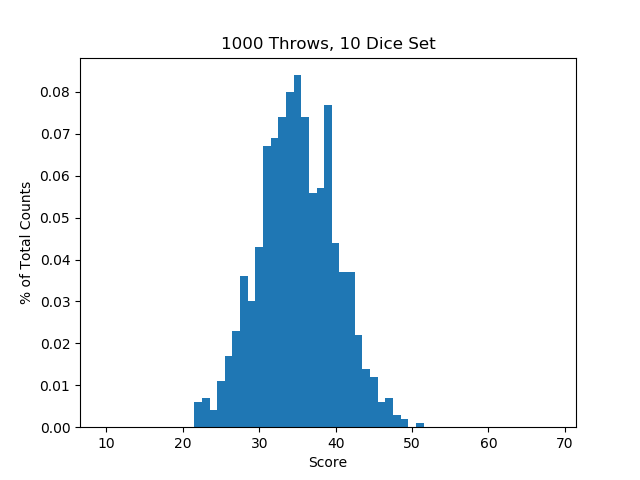

Mean for 10 Dice Set: 35.018
Standard Deviation for 10 Dice Set: 5.036037728214514


In [101]:
throws = 1000
Ns = [2,3,4,5,10]
for N in Ns:
    dist, bins, mean, stdev = multithrow(throws, N)
    titlestr = str(throws) + ' Throws, ' + str(N) + ' Dice Set'
    plt.figure()
    plt.title(titlestr)
    plt.hist(dist, bins, density=True)
    plt.xlabel('Score')
    plt.ylabel('% of Total Counts')
    
    meanstr = 'Mean for ' + str(N) + ' Dice Set:'
    stdstr = 'Standard Deviation for ' + str(N) + ' Dice Set:'
    print(meanstr, mean)
    print(stdstr, stdev)

plt.show()

In [102]:
multithrow(1000,5)[3]

3.839501920822544

<IPython.core.display.Javascript object>


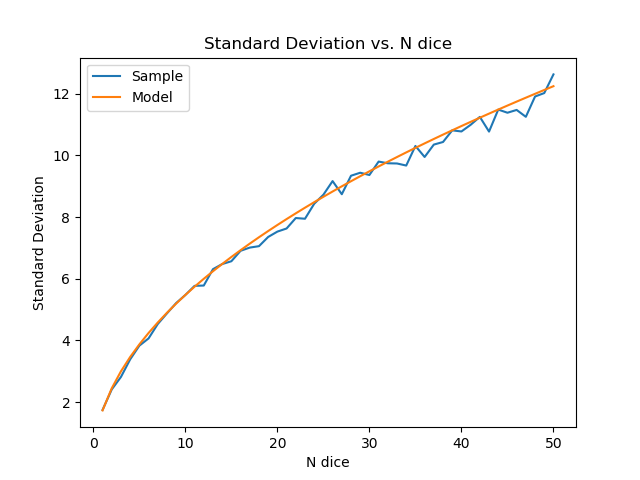

In [115]:
# Part 4
moreNs = np.arange(1,51)
stdevs = []
for N in moreNs:
    stdevs.append(multithrow(throws, N)[3])

plt.figure()
plt.title("Standard Deviation vs. N dice")
plt.plot(moreNs, stdevs, label = 'Sample') 
plt.plot(moreNs, (np.sqrt(3*moreNs)), label = 'Model')
plt.xlabel("N dice")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()

By plotting the standard deviation as a function of the number of dice, it is shown that the standard deviation scales approximately to the square root of N dice (the model just has an eyeballed factor, but the point still stands). By definition, the sample standard deviation (or standard error) is equal to the standard deviation of the population divided by square root of the sample size. Thus, this graph also demonstrates the similarity to taking N-sized samples from a distribution of large N. To further show CLT, the distribution becomes more and more "normal-like" as N increases (part 3). Below, here is a very large N dice set to drive home the point.

<IPython.core.display.Javascript object>


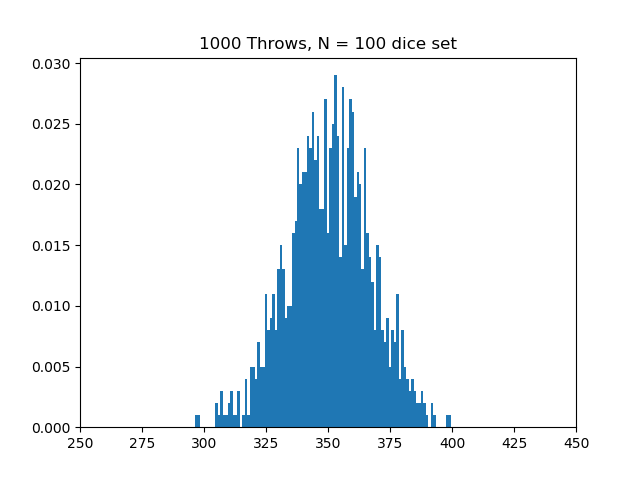

In [117]:
dist, bins, mean, stdev = multithrow(1000, N = 100)
plt.figure()
plt.title('1000 Throws, N = 100 dice set')
plt.hist(dist, bins, density = True)
plt.xlim(250,450)
plt.show()